In [8]:
import pandas as pd
import numpy as np
import talib as ta
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
import random
from matplotlib import rcParams
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
data=pd.read_csv(r"C:\Users\mmehu\germany1year.csv")
RFC=RandomForestClassifier()
RFR=RandomForestRegressor()

In [9]:
def Scaler(x):
    a=x-x.min()
    b=x.max()-x.min()
    c=-1+2*a/b
    return np.array(c)

In [10]:
data.head(40)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-15,24.090000,24.090000,24.047001,24.080000,23.802984,2400
1,2019-08-16,24.211000,24.370001,24.211000,24.370001,24.089649,1400
2,2019-08-19,24.760000,24.816000,24.688999,24.780001,24.494932,2700
3,2019-08-20,24.576000,24.576000,24.546000,24.546000,24.263624,1400
4,2019-08-21,24.870001,24.913000,24.870001,24.913000,24.626402,700
5,2019-08-22,24.879999,24.879999,24.812000,24.812000,24.526564,200
6,2019-08-23,24.605000,24.740000,24.605000,24.656000,24.372358,2500
7,2019-08-26,24.620001,24.632999,24.500000,24.542000,24.259670,5800
8,2019-08-27,24.799999,24.846001,24.670000,24.777000,24.491966,2100
9,2019-08-28,24.459999,24.684999,24.459999,24.684999,24.401024,1500


In [11]:
data=data.replace(0.0,np.NAN)

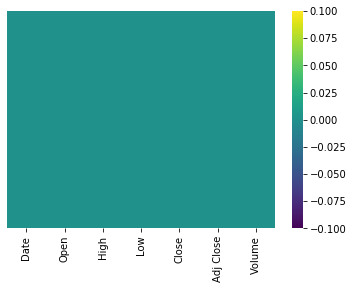

In [12]:
sns.heatmap(data.isnull(), yticklabels=False, cmap='viridis')

In [13]:
data.dropna(inplace=True)

In [14]:
data.head(40)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-15,24.090000,24.090000,24.047001,24.080000,23.802984,2400
1,2019-08-16,24.211000,24.370001,24.211000,24.370001,24.089649,1400
2,2019-08-19,24.760000,24.816000,24.688999,24.780001,24.494932,2700
3,2019-08-20,24.576000,24.576000,24.546000,24.546000,24.263624,1400
4,2019-08-21,24.870001,24.913000,24.870001,24.913000,24.626402,700
5,2019-08-22,24.879999,24.879999,24.812000,24.812000,24.526564,200
6,2019-08-23,24.605000,24.740000,24.605000,24.656000,24.372358,2500
7,2019-08-26,24.620001,24.632999,24.500000,24.542000,24.259670,5800
8,2019-08-27,24.799999,24.846001,24.670000,24.777000,24.491966,2100
9,2019-08-28,24.459999,24.684999,24.459999,24.684999,24.401024,1500


In [15]:
high=data.High
low=data.Low
open=data.Open
close=data.Close
date=data.Date

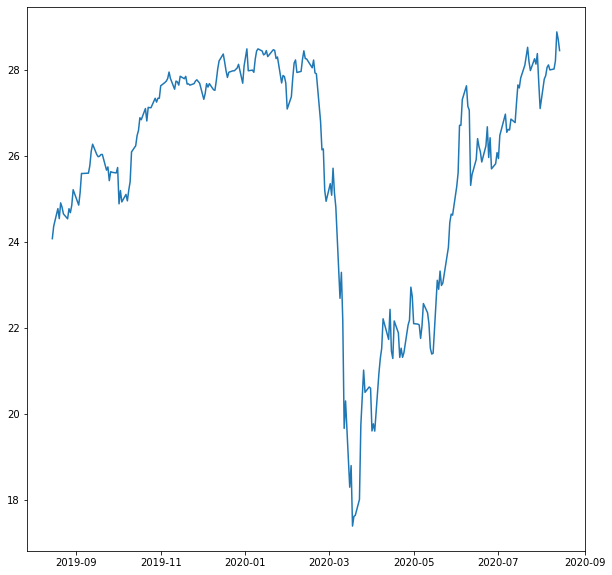

In [16]:
dict={"Date":date,"Close":close}
ts=pd.DataFrame(data=dict)
ts['Date'] = pd.to_datetime(ts['Date'], format="%Y/%m/%d")
ts.set_index(ts["Date"],drop=True,inplace=True)
ts.drop(["Date"],axis=1,inplace=True)
rcParams['figure.figsize']=10,10
plt.plot(ts);

# INDICATORS

In [17]:
sma=ta.SMA(close, 20)
ema=ta.EMA(close, 12)
macd, macdsignal, macdhist=ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9) #MACD>MSIG= BUY signal
rsi=ta.RSI(close, timeperiod=14)
willr=ta.WILLR(high, low, close) #above -20 overbought below -80 oversold
slowk,slowd=ta.STOCH(high,low,close,fastk_period=14)
roc = ta.ROC(close, timeperiod=10)
trix = ta.TRIX(close, timeperiod=5)
sar=ta.SAR(high,low)
cci=ta.CCI(high,low,close)
atr=ta.ATR(high,low,close,timeperiod=14)
adx=ta.ADX(high,low,close,timeperiod=14)

In [18]:
dict={"Close":close,"SMA":sma, "EMA":ema,"MACD":macd, 
      "RSI":rsi,"WillR":willr,"Slowk":slowk,"Slowd":slowd,"ROC":roc,"TRIX":trix,'SAR':sar,'CCI':cci,'ATR':atr,'ADX':adx}
featuredata=pd.DataFrame(data=dict)
featuredata.dropna(inplace=True)


In [19]:
featuredata

,Close,SMA,EMA,MACD,RSI,WillR,Slowk,Slowd,ROC,TRIX,SAR,CCI,ATR,ADX
33,24.889999,25.75230,25.571849,0.209517,41.904597,-95.862141,22.098998,25.636526,-4.269235,-0.190395,26.098026,-222.887008,0.254010,33.411849
34,25.200001,25.73240,25.514642,0.162701,47.887267,-65.789430,25.547947,25.629791,-3.225806,-0.241034,26.021945,-175.079383,0.273009,32.501217
35,24.934999,25.69925,25.425466,0.103027,43.740528,-83.223761,18.374889,22.007278,-4.243479,-0.296142,25.914589,-146.966104,0.272437,31.655630
36,25.110001,25.67450,25.376933,0.069061,47.004201,-71.710479,26.425443,23.449426,-2.204393,-0.302405,25.815822,-92.337447,0.265478,30.593065
37,24.959999,25.64225,25.312789,0.029696,44.615115,-81.579025,21.162245,21.987526,-3.067965,-0.303231,25.724956,-97.643421,0.260086,30.058486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,28.031000,27.95170,27.921974,0.363278,57.046101,-34.484869,67.010061,66.626222,-0.845419,0.042801,28.218710,-4.941137,0.474361,22.295895
249,28.219999,28.00070,27.967824,0.360143,59.197645,-23.030378,68.909052,67.905684,0.266474,0.075426,26.950001,89.142905,0.478978,22.123979
250,28.895000,28.06245,28.110466,0.407428,65.788599,-3.712825,79.590643,71.836585,1.778799,0.190492,26.982401,191.708054,0.498337,22.549580
251,28.725000,28.11920,28.205010,0.426271,63.027254,-15.476158,85.926880,78.142191,3.625545,0.270119,27.061905,144.322349,0.491313,23.055502


In [20]:
featuredata["ups and downs"]=featuredata["Close"].shift(-1)-featuredata["Close"]
featuredata


,Close,SMA,EMA,MACD,RSI,WillR,Slowk,Slowd,ROC,TRIX,SAR,CCI,ATR,ADX,ups and downs
33,24.889999,25.75230,25.571849,0.209517,41.904597,-95.862141,22.098998,25.636526,-4.269235,-0.190395,26.098026,-222.887008,0.254010,33.411849,0.310002
34,25.200001,25.73240,25.514642,0.162701,47.887267,-65.789430,25.547947,25.629791,-3.225806,-0.241034,26.021945,-175.079383,0.273009,32.501217,-0.265002
35,24.934999,25.69925,25.425466,0.103027,43.740528,-83.223761,18.374889,22.007278,-4.243479,-0.296142,25.914589,-146.966104,0.272437,31.655630,0.175002
36,25.110001,25.67450,25.376933,0.069061,47.004201,-71.710479,26.425443,23.449426,-2.204393,-0.302405,25.815822,-92.337447,0.265478,30.593065,-0.150002
37,24.959999,25.64225,25.312789,0.029696,44.615115,-81.579025,21.162245,21.987526,-3.067965,-0.303231,25.724956,-97.643421,0.260086,30.058486,0.248001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,28.031000,27.95170,27.921974,0.363278,57.046101,-34.484869,67.010061,66.626222,-0.845419,0.042801,28.218710,-4.941137,0.474361,22.295895,0.188999
249,28.219999,28.00070,27.967824,0.360143,59.197645,-23.030378,68.909052,67.905684,0.266474,0.075426,26.950001,89.142905,0.478978,22.123979,0.675001
250,28.895000,28.06245,28.110466,0.407428,65.788599,-3.712825,79.590643,71.836585,1.778799,0.190492,26.982401,191.708054,0.498337,22.549580,-0.170000
251,28.725000,28.11920,28.205010,0.426271,63.027254,-15.476158,85.926880,78.142191,3.625545,0.270119,27.061905,144.322349,0.491313,23.055502,-0.265001


In [21]:
featuredata["direction"]=featuredata.apply(lambda x:1 if x["ups and downs"]>0 else (-1 if x["ups and downs"]<0 else 0), axis=1) 
#featuredata["direction"]=featuredata.apply(lambda x:-1 if x["ups and downs"]<0 else 0, axis=1)
#featuredata.dropna(inplace=True)
featuredata

,Close,SMA,EMA,MACD,RSI,WillR,Slowk,Slowd,ROC,TRIX,SAR,CCI,ATR,ADX,ups and downs,direction
33,24.889999,25.75230,25.571849,0.209517,41.904597,-95.862141,22.098998,25.636526,-4.269235,-0.190395,26.098026,-222.887008,0.254010,33.411849,0.310002,1
34,25.200001,25.73240,25.514642,0.162701,47.887267,-65.789430,25.547947,25.629791,-3.225806,-0.241034,26.021945,-175.079383,0.273009,32.501217,-0.265002,-1
35,24.934999,25.69925,25.425466,0.103027,43.740528,-83.223761,18.374889,22.007278,-4.243479,-0.296142,25.914589,-146.966104,0.272437,31.655630,0.175002,1
36,25.110001,25.67450,25.376933,0.069061,47.004201,-71.710479,26.425443,23.449426,-2.204393,-0.302405,25.815822,-92.337447,0.265478,30.593065,-0.150002,-1
37,24.959999,25.64225,25.312789,0.029696,44.615115,-81.579025,21.162245,21.987526,-3.067965,-0.303231,25.724956,-97.643421,0.260086,30.058486,0.248001,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,28.031000,27.95170,27.921974,0.363278,57.046101,-34.484869,67.010061,66.626222,-0.845419,0.042801,28.218710,-4.941137,0.474361,22.295895,0.188999,1
249,28.219999,28.00070,27.967824,0.360143,59.197645,-23.030378,68.909052,67.905684,0.266474,0.075426,26.950001,89.142905,0.478978,22.123979,0.675001,1
250,28.895000,28.06245,28.110466,0.407428,65.788599,-3.712825,79.590643,71.836585,1.778799,0.190492,26.982401,191.708054,0.498337,22.549580,-0.170000,-1
251,28.725000,28.11920,28.205010,0.426271,63.027254,-15.476158,85.926880,78.142191,3.625545,0.270119,27.061905,144.322349,0.491313,23.055502,-0.265001,-1


In [22]:
featuredata=featuredata.reset_index(drop=True)
featuredata

,Close,SMA,EMA,MACD,RSI,WillR,Slowk,Slowd,ROC,TRIX,SAR,CCI,ATR,ADX,ups and downs,direction
0,24.889999,25.75230,25.571849,0.209517,41.904597,-95.862141,22.098998,25.636526,-4.269235,-0.190395,26.098026,-222.887008,0.254010,33.411849,0.310002,1
1,25.200001,25.73240,25.514642,0.162701,47.887267,-65.789430,25.547947,25.629791,-3.225806,-0.241034,26.021945,-175.079383,0.273009,32.501217,-0.265002,-1
2,24.934999,25.69925,25.425466,0.103027,43.740528,-83.223761,18.374889,22.007278,-4.243479,-0.296142,25.914589,-146.966104,0.272437,31.655630,0.175002,1
3,25.110001,25.67450,25.376933,0.069061,47.004201,-71.710479,26.425443,23.449426,-2.204393,-0.302405,25.815822,-92.337447,0.265478,30.593065,-0.150002,-1
4,24.959999,25.64225,25.312789,0.029696,44.615115,-81.579025,21.162245,21.987526,-3.067965,-0.303231,25.724956,-97.643421,0.260086,30.058486,0.248001,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,28.031000,27.95170,27.921974,0.363278,57.046101,-34.484869,67.010061,66.626222,-0.845419,0.042801,28.218710,-4.941137,0.474361,22.295895,0.188999,1
216,28.219999,28.00070,27.967824,0.360143,59.197645,-23.030378,68.909052,67.905684,0.266474,0.075426,26.950001,89.142905,0.478978,22.123979,0.675001,1
217,28.895000,28.06245,28.110466,0.407428,65.788599,-3.712825,79.590643,71.836585,1.778799,0.190492,26.982401,191.708054,0.498337,22.549580,-0.170000,-1
218,28.725000,28.11920,28.205010,0.426271,63.027254,-15.476158,85.926880,78.142191,3.625545,0.270119,27.061905,144.322349,0.491313,23.055502,-0.265001,-1


In [23]:
featuredata1=featuredata.dropna()
featuredata1

,Close,SMA,EMA,MACD,RSI,WillR,Slowk,Slowd,ROC,TRIX,SAR,CCI,ATR,ADX,ups and downs,direction
0,24.889999,25.75230,25.571849,0.209517,41.904597,-95.862141,22.098998,25.636526,-4.269235,-0.190395,26.098026,-222.887008,0.254010,33.411849,0.310002,1
1,25.200001,25.73240,25.514642,0.162701,47.887267,-65.789430,25.547947,25.629791,-3.225806,-0.241034,26.021945,-175.079383,0.273009,32.501217,-0.265002,-1
2,24.934999,25.69925,25.425466,0.103027,43.740528,-83.223761,18.374889,22.007278,-4.243479,-0.296142,25.914589,-146.966104,0.272437,31.655630,0.175002,1
3,25.110001,25.67450,25.376933,0.069061,47.004201,-71.710479,26.425443,23.449426,-2.204393,-0.302405,25.815822,-92.337447,0.265478,30.593065,-0.150002,-1
4,24.959999,25.64225,25.312789,0.029696,44.615115,-81.579025,21.162245,21.987526,-3.067965,-0.303231,25.724956,-97.643421,0.260086,30.058486,0.248001,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,28.010000,27.88930,27.902151,0.381239,56.811131,-35.757597,67.797940,63.784470,0.053577,0.024721,28.271573,-20.786541,0.500081,23.485635,0.021000,1
215,28.031000,27.95170,27.921974,0.363278,57.046101,-34.484869,67.010061,66.626222,-0.845419,0.042801,28.218710,-4.941137,0.474361,22.295895,0.188999,1
216,28.219999,28.00070,27.967824,0.360143,59.197645,-23.030378,68.909052,67.905684,0.266474,0.075426,26.950001,89.142905,0.478978,22.123979,0.675001,1
217,28.895000,28.06245,28.110466,0.407428,65.788599,-3.712825,79.590643,71.836585,1.778799,0.190492,26.982401,191.708054,0.498337,22.549580,-0.170000,-1


In [24]:
#featuredata["Closelag1"]=featuredata.Close.shift(1)
#featuredata["Closelag2"]=featuredata.Close.shift(2)
#featuredata.dropna(inplace=True)

In [25]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=3)
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}
# Create a based model
RFC = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RFC, param_grid = param_grid, 
                          cv = tscv, n_jobs = -1, verbose = 2)

In [26]:
X=featuredata1[['SMA','EMA','MACD','RSI','WillR','Slowk','Slowd','ROC','TRIX','SAR','CCI','ATR','ADX']]
y=featuredata1["direction"]
RescaledX=Scaler(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(RescaledX, y, test_size=0.30, shuffle=False)

In [27]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  3.0min finished


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [32]:
RFC=RandomForestClassifier(bootstrap= True,
 max_depth= 80,
 max_features= 2,
 min_samples_leaf= 3,
 min_samples_split= 8,
 n_estimators= 100)
RFC.fit(X_train,y_train)
y_pred=RFC.predict(X_test)
accuracy_score(y_test,y_pred)



0.5454545454545454

# GA for classifier

In [33]:
class GeneticSelector():
    def __init__(self, estimator, n_gen, size, n_best, n_rand, 
                 n_children, mutation_rate):
        # Estimator 
        self.estimator = estimator
        # Number of generations
        self.n_gen = n_gen
        # Number of chromosomes in population
        self.size = size
        # Number of best chromosomes to select
        self.n_best = n_best
        # Number of random chromosomes to select
        self.n_rand = n_rand
        # Number of children created during crossover
        self.n_children = n_children
        # Probablity of chromosome mutation
        self.mutation_rate = mutation_rate
        
        #if int((self.n_best + self.n_rand) / 2) * self.n_children != self.size:
            #raise ValueError("The population size is not stable.")  
    
    def initialization(self):
        population=[]
        for i in range(self.size):  # size-no. of chromosomes in population
            chromosome=np.ones(self.n_features,dtype=np.bool) #makes an array of true
            mask=np.random.rand(len(chromosome))<0.3 #makes a boolean array when the value of the random int is <0.3 returns true.
            chromosome[mask]=False #when the mask array is having a true then at this position chromosome array is changed from true to false.
            population.append(chromosome)
        return population
    def fitness(self,population):
        scores=[]
        X, y = self.dataset
        X=pd.DataFrame(data=Scaler(X))
        X_train = X[:int(X.shape[0]*0.7)]
        X_test = X[int(X.shape[0]*0.7):]
        y_train = y[:int(X.shape[0]*0.7)]
        y_test = y[int(X.shape[0]*0.7):]
        for chromosome in population:
            try:
                self.estimator.fit(X_train.iloc[:,chromosome],y_train)
                predictions = self.estimator.predict(X_test.iloc[:,chromosome])            
                scores.append(accuracy_score(y_test,predictions))
            except:
                continue
        scores, population = np.array(scores), np.array(population) #to sort the scores list its converted to array
        inds=np.argsort(scores)[::-1] # reversed the order to get indices in descending order of the values.
        return list(scores[inds]), list(population[inds,:]) #sorted scores array is converted into list and the population of chromosomes is arranged according to scores
    
    def select(self, population_sorted):
        population_next = []
        for i in range(self.n_best):
            population_next.append(population_sorted[i]) #these are best selected parents
        for i in range(self.n_rand):
            population_next.append(random.choice(population_sorted)) #these are randomly selected parents
        random.shuffle(population_next)
        return population_next    
    
    def crossover(self,population):  #adding  crossover  method to our class, which mixes the genes of the previously selected   n_best+n_rand  parents.
        population_next=[]
        for i in range(int(len(population)/2)): #is done as 2 parents(chromosomes) are reqd for a child.
            for j in range(self.n_children):
                chromosome1,chromosome2=population[i], population[len(population)-1-i]  #mating criteria is first and last parent from population.-1 is there because index starts from 0 whereas length starts from 1.
                child = chromosome1
                mask = np.random.rand(len(child))>0.5 # with 50% probability genes are mutated
                child[mask]=chromosome2[mask] #when mask is true the chromosome2 boolean values are put into the child with same indexes.
                population_next.append(child)
        return population_next
    
    def mutate(self,population):
        population_next=[]
        for i in range(len(population)):
            chromosome=population[i]
            if random.random()<self.mutation_rate: # 2 probabilites are involved here 1 is self mutation rate and other is 0.05.
                mask=np.random.rand(len(chromosome))<0.05
                chromosome[mask]=False
            population_next.append(chromosome)
        return population_next
    
    def generate(self,population):
        #selection crossover and mutation
        scores_sorted,population_sorted=self.fitness(population)
        population=self.select(population_sorted)
        population=self.crossover(population)
        population=self.mutate(population)
    
        #History ( saves the best results of each generation.)
        self.chromosomes_best.append(population_sorted[0])
        self.scores_best.append(scores_sorted[0])
        self.scores_avg.append(np.mean(scores_sorted))
    
        return population
    
    def fit(self,X,y): #pass data and perform genetic algorithm
        
        self.chromosomes_best = []
        self.scores_best, self.scores_avg  = [], []
        
        self.dataset = X, y
        self.n_features = X.shape[1]
        
        population = self.initialization()
        for i in range(self.n_gen):
            population = self.generate(population)            
        return self
    
    @property
    def support_(self): # returns a chromosome with the best features (the best chromosome from the last generation).
        return self.chromosomes_best[-1] 
 
    def plot_scores(self):
        plt.plot(self.scores_best, label='Best')
        plt.plot(self.scores_avg, label='Average')
        plt.legend(loc="best")
        plt.ylabel('Scores')
        plt.xlabel('Generation')
        plt.show()

In [34]:
X=featuredata1[['SMA','EMA','MACD','RSI','WillR','Slowk','Slowd','ROC','TRIX','SAR','CCI','ATR','ADX']]
y=featuredata1["direction"]

In [35]:
sel = GeneticSelector(estimator=RFC,n_gen=20, size=90, n_best=25, n_rand=25, 
                      n_children=25, mutation_rate=0.05)

In [36]:
sel.fit(X,y)

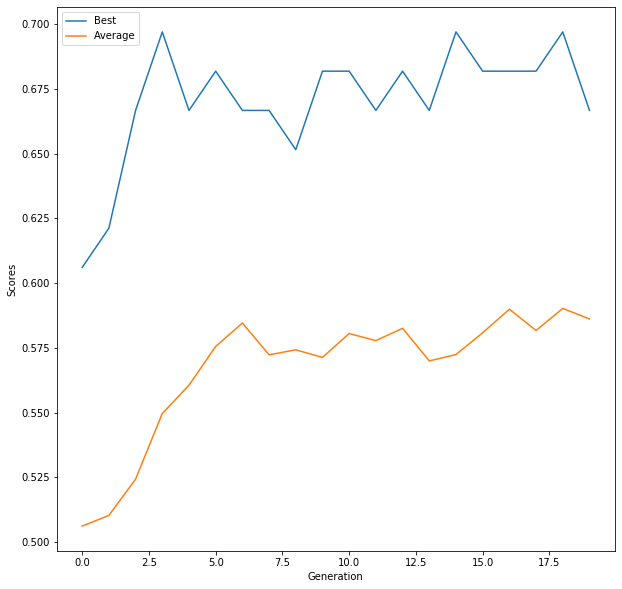

In [37]:
sel.plot_scores()

In [38]:
sel.scores_best

[0.6060606060606061,
 0.6212121212121212,
 0.6666666666666666,
 0.696969696969697,
 0.6666666666666666,
 0.6818181818181818,
 0.6666666666666666,
 0.6666666666666666,
 0.6515151515151515,
 0.6818181818181818,
 0.6818181818181818,
 0.6666666666666666,
 0.6818181818181818,
 0.6666666666666666,
 0.696969696969697,
 0.6818181818181818,
 0.6818181818181818,
 0.6818181818181818,
 0.696969696969697,
 0.6666666666666666]

In [39]:
sel.chromosomes_best

[array([ True,  True,  True,  True,  True,  True, False, False, False,
         True, False,  True,  True]),
 array([ True,  True,  True,  True,  True,  True,  True,  True, False,
         True,  True,  True,  True]),
 array([False,  True, False, False,  True,  True, False,  True, False,
         True, False, False,  True]),
 array([False,  True, False, False,  True,  True, False,  True, False,
         True, False, False,  True]),
 array([False,  True, False, False,  True,  True, False,  True, False,
         True, False, False, False]),
 array([False, False, False, False,  True, False, False,  True, False,
         True, False, False, False]),
 array([False,  True, False, False,  True,  True, False,  True, False,
         True, False, False, False]),
 array([False,  True, False, False,  True,  True, False,  True, False,
         True, False, False, False]),
 array([False,  True, False, False, False, False, False, False, False,
         True, False, False, False]),
 array([False,  Tru

# PCA

In [34]:
X=featuredata1[['SMA','EMA','MACD','RSI','WillR','Slowk','Slowd','ROC','TRIX','SAR','CCI','ATR','ADX']]


In [35]:
from sklearn.decomposition import PCA
pca= PCA(n_components=3)
x_pc=pca.fit_transform(X)

In [36]:
df=pd.DataFrame(data=x_pc,columns=["PC1","PC2","PC3"])
df['direction']=featuredata1['direction']
df

,PC1,PC2,PC3,direction
0,-443.467600,14.839817,-290.159907,-1
1,-476.910159,15.965391,-260.410199,-1
2,-510.382629,23.188846,-228.469083,-1
3,-525.029032,33.036405,-178.352909,-1
4,-535.701129,41.305378,-126.268588,1
...,...,...,...,...
204,-316.461197,-223.374923,-76.897263,-1
205,-511.359376,-358.651288,175.199957,1
206,-517.930047,-340.857100,157.533177,1
207,-527.302539,-321.218708,138.014604,1


In [37]:
tscv = TimeSeriesSplit(n_splits=3)
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}
# Create a based model
RFC = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RFC, param_grid = param_grid, 
                          cv = tscv, n_jobs = -1, verbose = 2)

In [668]:
X=df[['PC1','PC2','PC3']]
y=df["direction"]
RescaledX=Scaler(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(RescaledX, y, test_size=0.30, shuffle=False)

In [669]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  7.1min finished


{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 300}

In [677]:
RFC=RandomForestClassifier(bootstrap= True,
 max_depth= 110,
 max_features= 3,
 min_samples_leaf= 5,
 min_samples_split= 12,
 n_estimators= 300)
RFC.fit(X_train,y_train)
y_pred=RFC.predict(X_test)
accuracy_score(y_test,y_pred)
X=df[["PC1","PC2","PC3"]]
RescaledX=Scaler(X)
y=df["direction"]
X_train, X_test, y_train, y_test = train_test_split(RescaledX, y, test_size=0.30, shuffle=False)
RFC.fit(X_train,y_train)
predictions = RFC.predict(X_test)            
accuracy_score(y_test,predictions)

0.5146036161335188

# PCA+GA

In [38]:
X=df[["PC1","PC2","PC3"]]
y=df["direction"]

In [39]:
sel1 = GeneticSelector(estimator=RFC,n_gen=40, size=20, n_best=5, n_rand=5, 
                      n_children=3, mutation_rate=0.05)

In [40]:
sel1.fit(X,y)

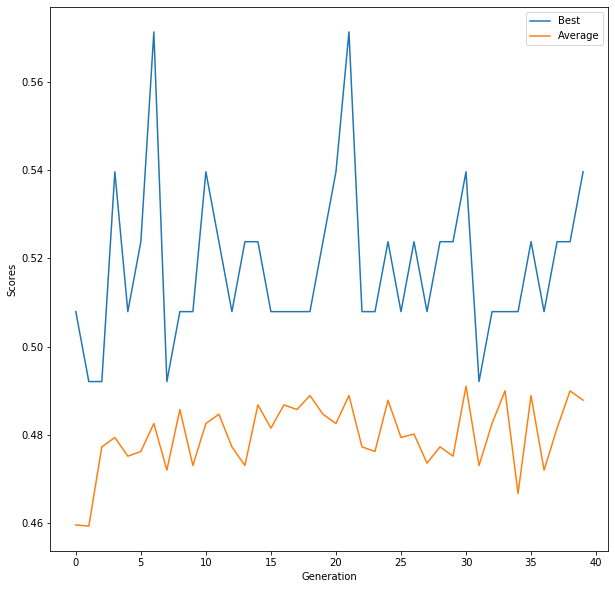

In [41]:
sel1.plot_scores()

In [42]:
sel1.scores_best

[0.5079365079365079,
 0.49206349206349204,
 0.49206349206349204,
 0.5396825396825397,
 0.5079365079365079,
 0.5238095238095238,
 0.5714285714285714,
 0.49206349206349204,
 0.5079365079365079,
 0.5079365079365079,
 0.5396825396825397,
 0.5238095238095238,
 0.5079365079365079,
 0.5238095238095238,
 0.5238095238095238,
 0.5079365079365079,
 0.5079365079365079,
 0.5079365079365079,
 0.5079365079365079,
 0.5238095238095238,
 0.5396825396825397,
 0.5714285714285714,
 0.5079365079365079,
 0.5079365079365079,
 0.5238095238095238,
 0.5079365079365079,
 0.5238095238095238,
 0.5079365079365079,
 0.5238095238095238,
 0.5238095238095238,
 0.5396825396825397,
 0.49206349206349204,
 0.5079365079365079,
 0.5079365079365079,
 0.5079365079365079,
 0.5238095238095238,
 0.5079365079365079,
 0.5238095238095238,
 0.5238095238095238,
 0.5396825396825397]

# Direction

In [413]:
best_chromosome=[False, False,  True, False,  True, False, False,  True, False,
        False, False, False,  True, False, False]

In [414]:
X=featuredata[['SMA','EMA','MACD','RSI','WillR','Slowk','Slowd','ROC','TRIX','SAR','CCI','ATR','ADX','Upper','Lower']]
y=featuredata['direction']

In [415]:
    X   = pd.DataFrame(data=Scaler(X))
X_train = X[:int(X.shape[0]*0.7)]
X_test  = X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test  = y[int(X.shape[0]*0.7):]

In [416]:
RFC=RandomForestClassifier(bootstrap= True,
 max_depth= 100,
 max_features= 2,
 min_samples_leaf= 3,
 min_samples_split= 12,
 n_estimators= 100)

In [456]:
RFC.fit(X_train.iloc[:,best_chromosome],y_train)
predictions = RFC.predict(X_test.iloc[:,best_chromosome])  

In [418]:
predictions=pd.DataFrame(data=predictions,columns=['direction'])

In [419]:
y_test.tail(1),predictions.tail(1)

(2434    0
 Name: direction, dtype: int64,
      direction
 730         -1)

# Price

In [30]:
RFR=RandomForestRegressor(n_jobs=-1)

# GA for regression

In [41]:
class GeneticSelectorRegression():
    def __init__(self, estimator, n_gen, size, n_best, n_rand, 
                 n_children, mutation_rate):
        # Estimator 
        self.estimator = estimator
        # Number of generations
        self.n_gen = n_gen
        # Number of chromosomes in population
        self.size = size
        # Number of best chromosomes to select
        self.n_best = n_best
        # Number of random chromosomes to select
        self.n_rand = n_rand
        # Number of children created during crossover
        self.n_children = n_children
        # Probablity of chromosome mutation
        self.mutation_rate = mutation_rate
        
        #if int((self.n_best + self.n_rand) / 2) * self.n_children != self.size:
            #raise ValueError("The population size is not stable.")  
    
    def initialization(self):
        population=[]
        for i in range(self.size):  # size-no. of chromosomes in population
            chromosome=np.ones(self.n_features,dtype=np.bool) #makes an array of true
            mask=np.random.rand(len(chromosome))<0.3 #makes a boolean array when the value of the random int is <0.3 returns true.
            chromosome[mask]=False #when the mask array is having a true then at this position chromosome array is changed from true to false.
            population.append(chromosome)
        return population
    def fitness(self,population):
        scores=[]
        X, y = self.dataset
        X=pd.DataFrame(data=Scaler(X))
        X_train = X[:int(X.shape[0]*0.7)]
        X_test = X[int(X.shape[0]*0.7):]
        y_train = y[:int(X.shape[0]*0.7)]
        y_test = y[int(X.shape[0]*0.7):]
        for chromosome in population:
            try:
                self.estimator.fit(X_train.iloc[:,chromosome],y_train)
                predictions = self.estimator.predict(X_test.iloc[:,chromosome])            
                scores.append(self.estimator.score(X_test.iloc[:,chromosome],y_test))
            except:
                continue
        scores, population = np.array(scores), np.array(population) #to sort the scores list its converted to array
        inds=np.argsort(scores)[::-1] # reversed the order to get indices in descending order of the values.
        return list(scores[inds]), list(population[inds,:]) #sorted scores array is converted into list and the population of chromosomes is arranged according to scores
    
    def select(self, population_sorted):
        population_next = []
        for i in range(self.n_best):
            population_next.append(population_sorted[i]) #these are best selected parents
        for i in range(self.n_rand):
            population_next.append(random.choice(population_sorted)) #these are randomly selected parents
        random.shuffle(population_next)
        return population_next    
    
    def crossover(self,population):  #adding  crossover  method to our class, which mixes the genes of the previously selected   n_best+n_rand  parents.
        population_next=[]
        for i in range(int(len(population)/2)): #is done as 2 parents(chromosomes) are reqd for a child.
            for j in range(self.n_children):
                chromosome1,chromosome2=population[i], population[len(population)-1-i]  #mating criteria is first and last parent from population.-1 is there because index starts from 0 whereas length starts from 1.
                child = chromosome1
                mask = np.random.rand(len(child))>0.5 # with 50% probability genes are mutated
                child[mask]=chromosome2[mask] #when mask is true the chromosome2 boolean values are put into the child with same indexes.
                population_next.append(child)
        return population_next
    
    def mutate(self,population):
        population_next=[]
        for i in range(len(population)):
            chromosome=population[i]
            if random.random()<self.mutation_rate: # 2 probabilites are involved here 1 is self mutation rate and other is 0.05.
                mask=np.random.rand(len(chromosome))<0.05
                chromosome[mask]=False
            population_next.append(chromosome)
        return population_next
    
    def generate(self,population):
        #selection crossover and mutation
        scores_sorted,population_sorted=self.fitness(population)
        population=self.select(population_sorted)
        population=self.crossover(population)
        population=self.mutate(population)
    
        #History ( saves the best results of each generation.)
        self.chromosomes_best.append(population_sorted[0])
        self.scores_best.append(scores_sorted[0])
        self.scores_avg.append(np.mean(scores_sorted))
    
        return population
    
    def fit(self,X,y): #pass data and perform genetic algorithm
        
        self.chromosomes_best = []
        self.scores_best, self.scores_avg  = [], []
        
        self.dataset = X, y
        self.n_features = X.shape[1]
        
        population = self.initialization()
        for i in range(self.n_gen):
            population = self.generate(population)            
        return self
    
    @property
    def support_(self): # returns a chromosome with the best features (the best chromosome from the last generation).
        return self.chromosomes_best[-1] 
 
    def plot_scores(self):
        plt.plot(self.scores_best, label='Best')
        plt.plot(self.scores_avg, label='Average')
        plt.legend(loc="best")
        plt.ylabel('Scores')
        plt.xlabel('Generation')
        plt.show()

In [42]:
sel2=GeneticSelectorRegression(estimator=RFR,n_gen=20, size=30, n_best=10, n_rand=10, 
                      n_children=10, mutation_rate=0.05)

In [43]:
X=featuredata1[['Close','SMA','EMA','MACD','RSI','WillR','Slowk','Slowd','ROC','TRIX']]
y=featuredata1['ups and downs']

In [44]:
sel2.fit(X,y)

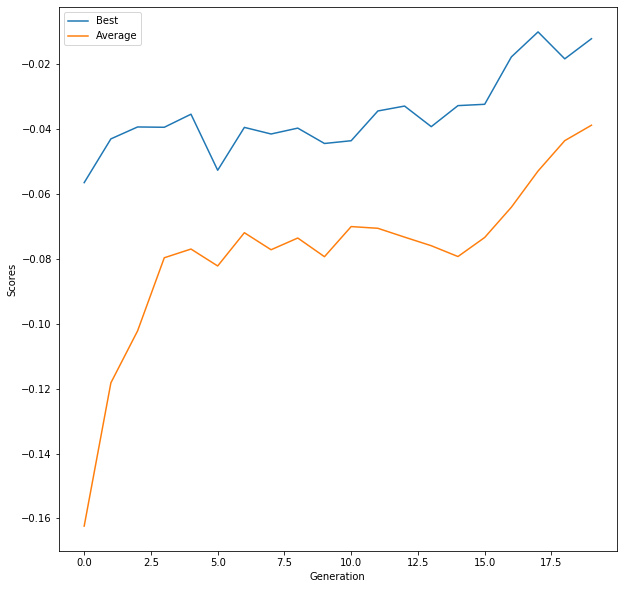

In [45]:
sel2.plot_scores()

In [46]:
sel2.scores_best

[-0.05665345683888412,
 -0.043185292637095245,
 -0.03951568440683961,
 -0.0396126580340086,
 -0.03559210538643143,
 -0.052838976001212457,
 -0.03964748918618244,
 -0.041679969013648455,
 -0.03987098959890578,
 -0.04459919878359031,
 -0.04375387382366558,
 -0.03459484363287002,
 -0.03308529558848594,
 -0.0394222742780268,
 -0.032948703473341334,
 -0.03254233527124195,
 -0.017964335174261103,
 -0.01026620824875124,
 -0.018553953939287382,
 -0.012358717215947612]

# PSO

In [43]:
X=featuredata1[['EMA','MACD','RSI','WillR','Slowk','Slowd','ROC','TRIX','SAR','CCI','ATR','ADX']]
RescaledX=Scaler(X)
y=featuredata1["direction"]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(RescaledX, y, test_size=0.30, shuffle=False)

C:\Users\mmehu\anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


RESULT:
Optimal solution: [81.93195214737439, 130, 5, 6, 10]
Objective function value: 0.746031746031746


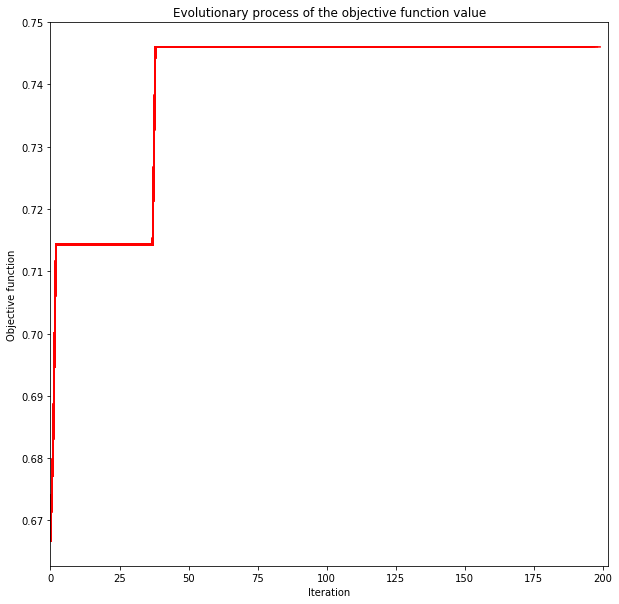

In [45]:
import random
import time
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
def objective_function(O):
    a = int(O[0])
    b = int(O[1])
    c = int(O[2])
    d = int(O[3])
    e = int(O[4])
    RFC=RandomForestClassifier( n_estimators= a, max_depth=b, max_features= c, min_samples_leaf= d, min_samples_split= e)
    RFC.fit(X_train,y_train)
    predictions=RFC.predict(X_test)    
    z = accuracy_score(y_test,predictions)
    return z
 
bounds = [(80, 150),(80,130),(2,5),(3,6),(6,10)]  # upper and lower bounds of variables[(Xmin,Xmax),(Ymin,ymax)]
nv = 5  # number of variables
mm = 1  # if minimization problem, mm = -1; if maximization problem, mm = 1
 
# PARAMETERS OF PSO
particle_size = 120  # number of particles
iterations = 200  # max number of iterations
w = 0.8  # inertia constant
c1 = 1  # cognative constant
c2 = 2  # social constant
 
# Visualization
fig = plt.figure()
ax = fig.add_subplot()
fig.show()
plt.title('Evolutionary process of the objective function value')
plt.xlabel("Iteration")
plt.ylabel("Objective function")
# ------------------------------------------------------------------------------
class Particle:
    def __init__(self, bounds):
        self.particle_position = []  # particle position
        self.particle_velocity = []  # particle velocity
        self.local_best_particle_position = []  # best position of the particle
        self.fitness_local_best_particle_position = initial_fitness  # initial objective function value of the best particle position
        self.fitness_particle_position = initial_fitness  # objective function value of the particle position
 
        for i in range(nv):
            self.particle_position.append(
                random.randint(bounds[i][0], bounds[i][1]))  # generate random initial position
            self.particle_velocity.append(random.uniform(-1, 1))  # generate random initial velocity
 
    def evaluate(self, objective_function):
        self.fitness_particle_position = objective_function(self.particle_position)
        if mm == -1:
            if self.fitness_particle_position < self.fitness_local_best_particle_position:
                self.local_best_particle_position = self.particle_position  # update the local best
                self.fitness_local_best_particle_position = self.fitness_particle_position  # update the fitness of the local best
        if mm == 1:
            if self.fitness_particle_position > self.fitness_local_best_particle_position:
                self.local_best_particle_position = self.particle_position  # update the local best
                self.fitness_local_best_particle_position = self.fitness_particle_position  # update the fitness of the local best
 
    def update_velocity(self, global_best_particle_position):
        for i in range(nv):
            r1 = random.random()
            r2 = random.random()
 
            cognitive_velocity = c1 * r1 * (self.local_best_particle_position[i] - self.particle_position[i])
            social_velocity = c2 * r2 * (global_best_particle_position[i] - self.particle_position[i])
            self.particle_velocity[i] = w * self.particle_velocity[i] + cognitive_velocity + social_velocity
 
    def update_position(self, bounds):
        for i in range(nv):
            self.particle_position[i] = self.particle_position[i] + self.particle_velocity[i]
 
            # check and repair to satisfy the upper bounds
            if self.particle_position[i] > bounds[i][1]:
                self.particle_position[i] = bounds[i][1]
            # check and repair to satisfy the lower bounds
            if self.particle_position[i] < bounds[i][0]:
                self.particle_position[i] = bounds[i][0]
 
class PSO:
    def __init__(self, objective_function, bounds, particle_size, iterations):
        fitness_global_best_particle_position = initial_fitness
        global_best_particle_position = []
        swarm_particle = []
        for i in range(particle_size):
            swarm_particle.append(Particle(bounds))
        A = []
 
        for i in range(iterations):
            for j in range(particle_size):
                swarm_particle[j].evaluate(objective_function)
 
                if mm == -1:
                    if swarm_particle[j].fitness_particle_position < fitness_global_best_particle_position:
                        global_best_particle_position = list(swarm_particle[j].particle_position)
                        fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)
                if mm == 1:
                    if swarm_particle[j].fitness_particle_position > fitness_global_best_particle_position:
                        global_best_particle_position = list(swarm_particle[j].particle_position)
                        fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)
            for j in range(particle_size):
                swarm_particle[j].update_velocity(global_best_particle_position)
                swarm_particle[j].update_position(bounds)
 
            A.append(fitness_global_best_particle_position)  # record the best fitness
            # Visualization
            ax.plot(A, color='r')
            fig.canvas.draw()
            ax.set_xlim(left=max(0, i - iterations), right=i + 3)
            time.sleep(0.001)
        print('RESULT:')
        print('Optimal solution:', global_best_particle_position)
        print('Objective function value:', fitness_global_best_particle_position)
# ------------------------------------------------------------------------------
if mm == -1:
    initial_fitness = float("inf")  # for minimization problem
if mm == 1:
    initial_fitness = -float("inf")  # for maximization problem
# ------------------------------------------------------------------------------
# Main PSO
PSO(objective_function, bounds, particle_size, iterations)
plt.show()

# PSO with best  features from ga

In [20]:
best_chromosome=[False, False, False, False,  True, False,  True, False, False,
         True, False,  True,  True]
X=featuredata[['SMA','EMA','MACD','RSI','WillR','Slowk','Slowd','ROC','TRIX','SAR','CCI','ATR','ADX']]
y=featuredata["direction"]
X=pd.DataFrame(data=Scaler(X))
X_train = X[:int(X.shape[0]*0.7)]
X_train=X_train.iloc[:,best_chromosome]
X_test = X[int(X.shape[0]*0.7):]
X_test=X_test.iloc[:,best_chromosome]
y_train = y[:int(X.shape[0]*0.7)]
y_test = y[int(X.shape[0]*0.7):]

C:\Users\mmehu\anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


RESULT:
Optimal solution: [88.03296207209466, 84.59110529291812, 2, 4.779986205902961, 6]
Objective function value: 0.5910987482614742


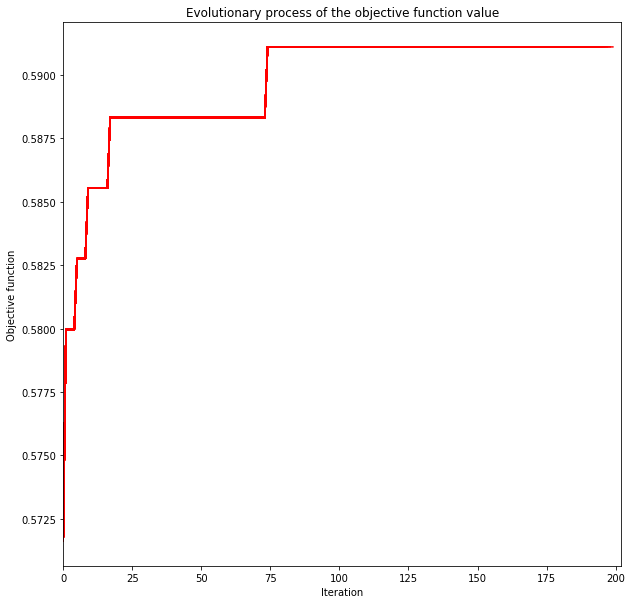

In [21]:
import random
import time
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
def objective_function(O):
    a = int(O[0])
    b = int(O[1])
    c = int(O[2])
    d = int(O[3])
    e = int(O[4])
    RFC=RandomForestClassifier(n_estimators= a, max_depth=b, max_features= c, min_samples_leaf= d, min_samples_split= e)
    RFC.fit(X_train,y_train)
    predictions=RFC.predict(X_test)    
    z = accuracy_score(y_test,predictions)
    return z
 
bounds = [(80, 150),(80,130),(2,5),(3,6),(6,10)]  # upper and lower bounds of variables[(Xmin,Xmax),(Ymin,ymax)]
nv = 5  # number of variables
mm = 1  # if minimization problem, mm = -1; if maximization problem, mm = 1
 
# PARAMETERS OF PSO
particle_size = 120  # number of particles
iterations = 200  # max number of iterations
w = 0.8  # inertia constant
c1 = 1  # cognative constant
c2 = 2  # social constant
 
# Visualization
fig = plt.figure()
ax = fig.add_subplot()
fig.show()
plt.title('Evolutionary process of the objective function value')
plt.xlabel("Iteration")
plt.ylabel("Objective function")
# ------------------------------------------------------------------------------
class Particle:
    def __init__(self, bounds):
        self.particle_position = []  # particle position
        self.particle_velocity = []  # particle velocity
        self.local_best_particle_position = []  # best position of the particle
        self.fitness_local_best_particle_position = initial_fitness  # initial objective function value of the best particle position
        self.fitness_particle_position = initial_fitness  # objective function value of the particle position
 
        for i in range(nv):
            self.particle_position.append(
                random.randint(bounds[i][0], bounds[i][1]))  # generate random initial position
            self.particle_velocity.append(random.uniform(-1, 1))  # generate random initial velocity
 
    def evaluate(self, objective_function):
        self.fitness_particle_position = objective_function(self.particle_position)
        if mm == -1:
            if self.fitness_particle_position < self.fitness_local_best_particle_position:
                self.local_best_particle_position = self.particle_position  # update the local best
                self.fitness_local_best_particle_position = self.fitness_particle_position  # update the fitness of the local best
        if mm == 1:
            if self.fitness_particle_position > self.fitness_local_best_particle_position:
                self.local_best_particle_position = self.particle_position  # update the local best
                self.fitness_local_best_particle_position = self.fitness_particle_position  # update the fitness of the local best
 
    def update_velocity(self, global_best_particle_position):
        for i in range(nv):
            r1 = random.random()
            r2 = random.random()
 
            cognitive_velocity = c1 * r1 * (self.local_best_particle_position[i] - self.particle_position[i])
            social_velocity = c2 * r2 * (global_best_particle_position[i] - self.particle_position[i])
            self.particle_velocity[i] = w * self.particle_velocity[i] + cognitive_velocity + social_velocity
 
    def update_position(self, bounds):
        for i in range(nv):
            self.particle_position[i] = self.particle_position[i] + self.particle_velocity[i]
 
            # check and repair to satisfy the upper bounds
            if self.particle_position[i] > bounds[i][1]:
                self.particle_position[i] = bounds[i][1]
            # check and repair to satisfy the lower bounds
            if self.particle_position[i] < bounds[i][0]:
                self.particle_position[i] = bounds[i][0]
 
class PSO:
    def __init__(self, objective_function, bounds, particle_size, iterations):
        fitness_global_best_particle_position = initial_fitness
        global_best_particle_position = []
        swarm_particle = []
        for i in range(particle_size):
            swarm_particle.append(Particle(bounds))
        A = []
 
        for i in range(iterations):
            for j in range(particle_size):
                swarm_particle[j].evaluate(objective_function)
 
                if mm == -1:
                    if swarm_particle[j].fitness_particle_position < fitness_global_best_particle_position:
                        global_best_particle_position = list(swarm_particle[j].particle_position)
                        fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)
                if mm == 1:
                    if swarm_particle[j].fitness_particle_position > fitness_global_best_particle_position:
                        global_best_particle_position = list(swarm_particle[j].particle_position)
                        fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)
            for j in range(particle_size):
                swarm_particle[j].update_velocity(global_best_particle_position)
                swarm_particle[j].update_position(bounds)
 
            A.append(fitness_global_best_particle_position)  # record the best fitness
            # Visualization
            ax.plot(A, color='r')
            fig.canvas.draw()
            ax.set_xlim(left=max(0, i - iterations), right=i + 3)
            time.sleep(0.001)
        print('RESULT:')
        print('Optimal solution:', global_best_particle_position)
        print('Objective function value:', fitness_global_best_particle_position)
# ------------------------------------------------------------------------------
if mm == -1:
    initial_fitness = float("inf")  # for minimization problem
if mm == 1:
    initial_fitness = -float("inf")  # for maximization problem
# ------------------------------------------------------------------------------
# Main PSO
PSO(objective_function, bounds, particle_size, iterations)
plt.show()